# Introduction
This kernel has been created by the [Information Systems Lab](http://islab.uom.gr) to introduce students of the [University of Macedonia](http://www.uom.gr/index.php?tmima=2&categorymenu=2), Greece to Machine Learning & Data Science.

## The Instacart competition
Instacart is an American company that operates as a same-day grocery delivery service. Customers select groceries through a web application from various retailers and delivered by a personal shopper. Instacart's service is mainly provided through a smartphone app, available on iOS and Android platforms, apart from its website.

In 2017 Instacart organised a Kaggle competition and provided to the community a sample dataset of over 3 million grocery orders from more than 200,000 Instacart users. The orders include 32 million basket items and 50,000 unique products. The objective of the competition was participants to **predict which previously purchased products will be in a user’s next order**.

## Objective
The objective of this Kernel is to introduce students to predictive business analytics with Python through the Instacart case. 

By the time you finish this example, you will be able to:
* Describe the steps of creating a predictive analytics model
* Use Python and Pandas package to manipulate data
* Use Python and Pandas package to create, combine, and delete DataFrames
* Use Logistic Regression to create a predictive model
* Apply the predictive model in order to make a prediction
* Create a submission file for the competition of Instacart

## Problem definition
The data that Instacart opened up include orders of 200,000 Instacart users with each user having between 4 and 100 orders. Instacart indicates each order in the data as prior, train or test. Prior orders describe the **past behaviour** of a user while train and test orders regard the **future behaviour that we need to predict**. 

As a result, we want to predict which previously purchased products (prior orders) will be in a user’s next order (train and test orders). 

For the train orders Instacart reveals the results (i.e., the ordered products) while for the test orders we do not have this piece of information. Moreover, the future order of each user can be either train or test meaning that each user will be either a train or a test user. 

The setting of the Instacart problem is described in the figure below (orders with yellow color denotes future orders of a user). 

<img src="https://i.imgur.com/S0Miw3m.png" width="350">

Each user has purchased various products during their prior orders. Moreover, for each user we know the order_id of their future order. The goal is to predict which of these products will be in a user's future order. 

This is a **classification problem** because we need to predict whether each pair of user and product is a reorder or not. This is indicated by the value of the reordered variable, i.e. reordered=1 or reordered=0 (see figure below). 

<img src="https://i.imgur.com/SxK2gsR.png" width="350">

As a result we need to come up and calculate various **predictor variables (X)** that will describe the characteristics of a product and the behaviour of a user regarding one or multiple products. We will do so by analysing the prior orders of the dataset. We will then use the train users to create a predictive model and the test users to make our actual prediction. As a result we create a table as the following one and we train an algorithm based on predictor variables (X) and response variable (Y).

<img src="https://i.imgur.com/Yb1CKAF.png" width="600">

## Method
Our method includes the following steps:
1. <b>Import and reshape data</b>: This step includes loading CSV files into pandas DataFrames, tranform character variables to categorical variables, and create a supportive table.
2. <b>Create predictor variables</b>: This step includes identifying and calculating predictor variables (aka features) from the initial datasets provided by Instacart. 
3. <b>Create train and test DataFrames</b>: In this step we create two distinct pandas DataFrames that will be used in the creation and the use of the predictive model.
4. <b>Create predictive model (fit)</b>: In this step we employ Logistic Regression to create the predictive model through the train dataset.
5. <b>Apply predictive model (predict)</b>: This step includes applying the model to predict the 'reordered' variable for the test dataset.
6. <b>Create submission file</b>: In this final step we create the submission file with our predictions for Instacart's competition.
7. <b>Get F1 score</b>: In this step we submit the produced and file and get the F1 score describing the accuracy of our prediction model.

# 1. Import and Reshape Data 
First we load the necessary Python packages and then we import the CSV files that were provided by Instacart.

## 1.1 Import the required packages
The garbage collector (package gc), attempts to reclaim garbage, or memory occupied by objects (e.g., DataFrames) that are no longer in use by Python ([ref1](https://www.techopedia.com/definition/1083/garbage-collection-gc-general-programming), [ref2](https://en.wikipedia.org/wiki/Garbage_collection_(computer_science)). This package will eliminate our risk to exceed the 16GB threshold of available RAM that Kaggle offers.

The **"as"** reserved word is to define an alias to the package. The alias help us to call easier a package in our code.

In [1]:
# For data manipulation
import pandas as pd 


# Garbage Collector to free up memory
import gc                         
gc.enable()                       # Activate 

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi({"username":"gregorchatzi","key":"092b1fcf740994a6396f44d14edac835"})
api.authenticate()
files = api.competition_download_files('instacart-market-basket-analysis')

In [3]:
import zipfile
with zipfile.ZipFile('instacart-market-basket-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('./input')

In [4]:
import os
working_directory = os.getcwd()+'/input'
os.chdir(working_directory)
for file in os.listdir(working_directory):   # get the list of files
    if zipfile.is_zipfile(file): # if it is a zipfile, extract it
        with zipfile.ZipFile(file) as item: # treat the file as a zip
           item.extractall()  # extract it in the working directory

## 1.2 Load data from the CSV files
Instacart provides 6 CSV files, which we have to load into Python. Towards this end, we use the .read_csv() function, which is included in the Pandas package. Reading in data with the .read_csv( ) function returns a DataFrame.

In [5]:
orders = pd.read_csv('../input/orders.csv')
order_products_train = pd.read_csv('../input/order_products__train.csv')
order_products_prior = pd.read_csv('./input/order_products__prior.csv')
products = pd.read_csv('../input/products.csv')
aisles = pd.read_csv('../input/aisles.csv')
departments = pd.read_csv('../input/departments.csv')

This step results in the following DataFrames:
* <b>orders</b>: This table includes all orders, namely prior, train, and test. It has single primary key (<b>order_id</b>).
* <b>order_products_train</b>: This table includes training orders. It has a composite primary key (<b>order_id and product_id</b>) and indicates whether a product in an order is a reorder or not (through the reordered variable).
* <b>order_products_prior </b>: This table includes prior orders. It has a composite primary key (<b>order_id and product_id</b>) and indicates whether a product in an order is a reorder or not (through the reordered variable).
* <b>products</b>: This table includes all products. It has a single primary key (<b>product_id</b>)
* <b>aisles</b>: This table includes all aisles. It has a single primary key (<b>aisle_id</b>)
* <b>departments</b>: This table includes all departments. It has a single primary key (<b>department_id</b>)

If you want to reduce the execution time of this Kernel you can use the following piece of code by uncomment it. This will trim the orders DataFrame and will keep a 10% random sample of the users. You can use this for experimentation.

In [6]:

#### Remove triple quotes to trim your dataset and experiment with your data
# COMMANDS FOR CODING TESTING - Get 10% of users 
orders = orders.loc[orders.user_id.isin(orders.user_id.drop_duplicates().sample(frac=0.1, random_state=25))] 


We now use the .head( ) method in order to visualise the first 10 rows of these tables. Click the Output button below to see the tables.

In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,2565571,7,prior,1,3,9,NaN
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
57,1695742,7,prior,4,2,10,9.0
58,3321109,7,prior,5,5,18,3.0


In [8]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## 1.3 Reshape data
We transform the data in order to facilitate their further analysis. First, we convert character variables into categories so we can use them in the creation of the model. In Python, a categorical variable is called category and has a fixed number of different values.

In [13]:
# We convert character variables into category. 
# In Python, a categorical variable is called category and has a fixed number of different values
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

## 1.4 Create a DataFrame with the orders and the products that have been purchased on prior orders (op)
We create a new DataFrame, named <b>op</b> which combines (merges) the DataFrames <b>orders</b> and <b>order_products_prior</b>. Bear in mind that <b>order_products_prior</b> DataFrame includes only prior orders, so the new DataFrame <b>op</b>  will contain only these observations as well. Towards this end, we use pandas' merge function with how='inner' argument, which returns records that have matching values in both DataFrames. <img src="https://i.imgur.com/zEK7FpY.jpg" width="400">

In [14]:
#Merge the orders DF with order_products_prior by their order_id, keep only these rows with order_id that they are appear on both DFs
op = orders.merge(order_products_prior, on='order_id', how='inner')
op.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2565571,7,prior,1,3,9,NaN,45628,1,0
1,2565571,7,prior,1,3,9,NaN,39275,2,0
2,2565571,7,prior,1,3,9,NaN,6361,3,0
3,2565571,7,prior,1,3,9,NaN,45066,4,0
4,2565571,7,prior,1,3,9,NaN,13249,5,0


The table contains for all the customers **(user_id)**: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ➡︎ the orders **(order_id)** that they have placed accompanied with: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ➡︎ the products **(product_id)** that have been bought in each order

In [15]:
op['order_number_back'] = op.groupby('user_id')['order_number'].transform(max) - op.order_number +1
op.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
0,2565571,7,prior,1,3,9,NaN,45628,1,0,20
1,2565571,7,prior,1,3,9,NaN,39275,2,0,20
2,2565571,7,prior,1,3,9,NaN,6361,3,0,20
3,2565571,7,prior,1,3,9,NaN,45066,4,0,20
4,2565571,7,prior,1,3,9,NaN,13249,5,0,20
5,2565571,7,prior,1,3,9,NaN,31683,6,0,20
6,2565571,7,prior,1,3,9,NaN,519,7,0,20
7,2565571,7,prior,1,3,9,NaN,37999,8,0,20
8,2565571,7,prior,1,3,9,NaN,49508,9,0,20
9,2565571,7,prior,1,3,9,NaN,29871,10,0,20


In [16]:
op5 = op[op.order_number_back <= 5]
op5.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
148,2425840,7,prior,16,0,13,11.0,37602,1,1,5
149,2425840,7,prior,16,0,13,11.0,40852,2,1,5
150,2425840,7,prior,16,0,13,11.0,21137,3,1,5
151,2425840,7,prior,16,0,13,11.0,17638,4,1,5
152,2425840,7,prior,16,0,13,11.0,42265,5,0,5


# 2. Create Predictor Variables
We are now ready to identify and calculate predictor variables based on the provided data. We can create various types of predictors such as:
* <b>User predictors</b> describing the behavior of a user e.g. total number of orders of a user.
* <b>Product predictors</b> describing characteristics of a product e.g. total number of times a product has been purchased.
* <b>User & product predictors</b> describing the behavior of a user towards a specific product e.g. total times a user ordered a specific product.

## 2.1 Create user predictors


### 2.1.1 Number of orders per customer 📚📝
We calculate the total number of placed orders per customer. We create a **user** DataFrame to store the results.

In [17]:
user = op.groupby('user_id')['order_number'].max().to_frame('user_t_orders') #
user = user.reset_index()
user.head()

,user_id,user_t_orders
0,7,20
1,14,13
2,22,15
3,24,18
4,29,18


In [18]:
u_reorder = op.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio') #
u_reorder = u_reorder.reset_index()
u_reorder.head()

,user_id,u_reordered_ratio
0,7,0.669903
1,14,0.323810
2,22,0.507246
3,24,0.526316
4,29,0.702222


In [19]:
u_reorder5 = op5.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio_5') #
u_reorder5 = u_reorder5.reset_index()
u_reorder5.head()

,user_id,u_reordered_ratio_5
0,7,0.637931
1,14,0.435897
2,22,0.760000
3,24,0.583333
4,29,0.775000


In [20]:
user=user.merge(u_reorder,on='user_id',how='left')#
del u_reorder
gc.collect()

user.head()

,user_id,user_t_orders,u_reordered_ratio
0,7,20,0.669903
1,14,13,0.323810
2,22,15,0.507246
3,24,18,0.526316
4,29,18,0.702222


In [21]:
user=user.merge(u_reorder5,on='user_id',how='left')#
del u_reorder5
gc.collect()

user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5
0,7,20,0.669903,0.637931
1,14,13,0.323810,0.435897
2,22,15,0.507246,0.760000
3,24,18,0.526316,0.583333
4,29,18,0.702222,0.775000


In [22]:
days = op.groupby('user_id')['days_since_prior_order'].mean().to_frame('mean_days')
days = days.reset_index()
days.head()

,user_id,mean_days
0,7,13.546392
1,14,24.570732
2,22,11.952381
3,24,15.162162
4,29,11.793427


In [23]:
days5 = op5.groupby('user_id')['days_since_prior_order'].mean().to_frame('mean_days_5')
days5 = days5.reset_index()
days5.head()

,user_id,mean_days_5
0,7,11.810345
1,14,20.961538
2,22,6.120000
3,24,9.083333
4,29,14.112500


In [24]:
user = user.merge(days, on='user_id', how='left')
del days
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days
0,7,20,0.669903,0.637931,13.546392
1,14,13,0.323810,0.435897,24.570732
2,22,15,0.507246,0.760000,11.952381
3,24,18,0.526316,0.583333,15.162162
4,29,18,0.702222,0.775000,11.793427


In [25]:
user = user.merge(days5, on='user_id', how='left')
del days5
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5
0,7,20,0.669903,0.637931,13.546392,11.810345
1,14,13,0.323810,0.435897,24.570732,20.961538
2,22,15,0.507246,0.760000,11.952381,6.120000
3,24,18,0.526316,0.583333,15.162162,9.083333
4,29,18,0.702222,0.775000,11.793427,14.112500


In [26]:
user_max = op.groupby(['user_id','order_id'])['add_to_cart_order'].max().to_frame('max_basket')
user_max.head()

max_basket
user_id order_id            
7       23391             11
        121053            24
        369015             5
        565870             9
        776265             8

In [27]:
user_max_ratio = user_max.groupby('user_id')['max_basket'].mean().to_frame('mean_basket')
user_max_ratio = user_max_ratio.reset_index()
user_max_ratio.head()

,user_id,mean_basket
0,7,10.300000
1,14,16.153846
2,22,4.600000
3,24,2.111111
4,29,12.500000


In [28]:
user = user.merge(user_max_ratio, on='user_id', how='left')
del user_max_ratio
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket
0,7,20,0.669903,0.637931,13.546392,11.810345,10.300000
1,14,13,0.323810,0.435897,24.570732,20.961538,16.153846
2,22,15,0.507246,0.760000,11.952381,6.120000,4.600000
3,24,18,0.526316,0.583333,15.162162,9.083333,2.111111
4,29,18,0.702222,0.775000,11.793427,14.112500,12.500000


In [29]:
user_max5 = op5.groupby(['user_id','order_id'])['add_to_cart_order'].max().to_frame('max_basket5')
user_max5.head()

max_basket5
user_id order_id             
7       23391              11
        369015              5
        2425840            17
        2452257            12
        2984707            13

In [30]:
user_max_ratio5 = user_max5.groupby('user_id')['max_basket5'].mean().to_frame('mean_basket5')
user_max_ratio5 = user_max_ratio5.reset_index()
user_max_ratio5.head()

,user_id,mean_basket5
0,7,11.6
1,14,15.6
2,22,5.0
3,24,2.4
4,29,16.0


In [31]:
user = user.merge(user_max_ratio5, on='user_id', how='left')
del user_max_ratio5
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5
0,7,20,0.669903,0.637931,13.546392,11.810345,10.300000,11.6
1,14,13,0.323810,0.435897,24.570732,20.961538,16.153846,15.6
2,22,15,0.507246,0.760000,11.952381,6.120000,4.600000,5.0
3,24,18,0.526316,0.583333,15.162162,9.083333,2.111111,2.4
4,29,18,0.702222,0.775000,11.793427,14.112500,12.500000,16.0


In [32]:
del  user_max, user_max5
gc.collect()
user.head()

,user_id,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5
0,7,20,0.669903,0.637931,13.546392,11.810345,10.300000,11.6
1,14,13,0.323810,0.435897,24.570732,20.961538,16.153846,15.6
2,22,15,0.507246,0.760000,11.952381,6.120000,4.600000,5.0
3,24,18,0.526316,0.583333,15.162162,9.083333,2.111111,2.4
4,29,18,0.702222,0.775000,11.793427,14.112500,12.500000,16.0


# **Products**

In [33]:
# Create distinct groups for each product, count the orders, save the result for each product to a new DataFrame  
prd = op.groupby('product_id')['order_id'].count().to_frame('prd_t_purchases') #
prd = prd.reset_index()
prd.head()

,product_id,prd_t_purchases
0,1,205
1,2,13
2,3,15
3,4,37
4,6,1


In [34]:
# Reset the index of the DF so to bring product_id rom index to column (pre-requisite for step 2.4)
prd5 = op5.groupby('product_id')['order_id'].count().to_frame('prd_t_purchases5') #
prd5 = prd5.reset_index()
prd5.head()

,product_id,prd_t_purchases5
0,1,49
1,2,4
2,3,4
3,4,21
4,7,1


In [35]:
prd = prd.merge(prd5, on='product_id', how='left')

#delete the reorder DataFrame
del prd5
gc.collect()

prd.head()

,product_id,prd_t_purchases,prd_t_purchases5
0,1,205,49.0
1,2,13,4.0
2,3,15,4.0
3,4,37,21.0
4,6,1,NaN


In [36]:
#REMOVE PRODUCTS WITH LESS THAN 40 PURCHASES
# execution time: 25 sec
# the x on lambda function is a temporary variable which represents each group
# shape[0] on a DataFrame returns the number of rows
p_reorder = op.groupby('product_id').filter(lambda x: x.shape[0] >40)#####
p_reorder.head()####

###Auto einai to diko mou filtro

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
1,2565571,7,prior,1,3,9,NaN,39275,2,0,20
2,2565571,7,prior,1,3,9,NaN,6361,3,0,20
3,2565571,7,prior,1,3,9,NaN,45066,4,0,20
4,2565571,7,prior,1,3,9,NaN,13249,5,0,20
5,2565571,7,prior,1,3,9,NaN,31683,6,0,20


In [37]:
p_reorder = op.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
p_reorder = p_reorder.reset_index()
p_reorder.head()

,product_id,p_reorder_ratio
0,1,0.692683
1,2,0.230769
2,3,0.466667
3,4,0.540541
4,6,0.000000


In [38]:
#Merge the prd DataFrame with reorder
prd = prd.merge(p_reorder, on='product_id', how='left')

#delete the reorder DataFrame
del p_reorder
gc.collect()

prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio
0,1,205,49.0,0.692683
1,2,13,4.0,0.230769
2,3,15,4.0,0.466667
3,4,37,21.0,0.540541
4,6,1,NaN,0.000000


In [39]:
prd['p_reorder_ratio'] = prd['p_reorder_ratio'].fillna(0) #
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio
0,1,205,49.0,0.692683
1,2,13,4.0,0.230769
2,3,15,4.0,0.466667
3,4,37,21.0,0.540541
4,6,1,NaN,0.000000


In [40]:
p_reorder5 = op5.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio5')
p_reorder5 = p_reorder5.reset_index()
p_reorder5.head()

,product_id,p_reorder_ratio5
0,1,0.530612
1,2,0.500000
2,3,0.500000
3,4,0.571429
4,7,0.000000


In [41]:
prd = prd.merge(p_reorder5, on='product_id', how='left')

#delete the reorder DataFrame
del p_reorder5
gc.collect()
prd['p_reorder_ratio5'] = prd['p_reorder_ratio5'].fillna(0)
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5
0,1,205,49.0,0.692683,0.530612
1,2,13,4.0,0.230769,0.500000
2,3,15,4.0,0.466667,0.500000
3,4,37,21.0,0.540541,0.571429
4,6,1,NaN,0.000000,0.000000


In [42]:
aop = op.groupby('product_id')['add_to_cart_order'].mean().to_frame("aop_mean")
aop = aop.reset_index()
aop.head()

,product_id,aop_mean
0,1,7.878049
1,2,11.384615
2,3,4.533333
3,4,6.972973
4,6,26.000000


In [43]:
prd = prd.merge(aop, on='product_id', how='left')
del aop
gc.collect()
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean
0,1,205,49.0,0.692683,0.530612,7.878049
1,2,13,4.0,0.230769,0.500000,11.384615
2,3,15,4.0,0.466667,0.500000,4.533333
3,4,37,21.0,0.540541,0.571429,6.972973
4,6,1,NaN,0.000000,0.000000,26.000000


In [44]:
aop5 = op5.groupby('product_id')['add_to_cart_order'].mean().to_frame("aop_mean5")
aop5 = aop5.reset_index()
aop5.head()

,product_id,aop_mean5
0,1,5.530612
1,2,17.750000
2,3,4.000000
3,4,7.285714
4,7,7.000000


In [45]:
prd = prd.merge(aop5, on='product_id', how='left')
del aop5
gc.collect()
prd.head()

,product_id,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5
0,1,205,49.0,0.692683,0.530612,7.878049,5.530612
1,2,13,4.0,0.230769,0.500000,11.384615,17.750000
2,3,15,4.0,0.466667,0.500000,4.533333,4.000000
3,4,37,21.0,0.540541,0.571429,6.972973,7.285714
4,6,1,NaN,0.000000,0.000000,26.000000,NaN


## 2.3 Create user-product predictors


### 2.3.1 How many times a user bought a product 📚📝
We create different groups that contain all the rows for each combination of user and product. Then with the aggregation function .count( ) we get how many times each user bought a product. We save the results on new **uxp** DataFrame.

In [46]:
# Create distinct groups for each combination of user and product, count orders, save the result for each user X product to a new DataFrame 
uxp = op.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_t_bought') #
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_t_bought
0,7,274,1
1,7,519,2
2,7,4920,7
3,7,4945,3
4,7,6361,5


In [47]:
times = op.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
7       274                      1
        519                      2
        4920                     7
        4945                     3
        6361                     5

In [48]:
total_orders = op.groupby('user_id')['order_number'].max().to_frame('total_orders') #
total_orders.head()

,total_orders
user_id,
7,20
14,13
22,15
24,18
29,18


In [49]:
first_order_no = op.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,7,274,2
1,7,519,1
2,7,4920,2
3,7,4945,16
4,7,6361,1


In [50]:
span = pd.merge(total_orders, first_order_no, on='user_id', how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,7,20,274,2
1,7,20,519,1
2,7,20,4920,2
3,7,20,4945,16
4,7,20,6361,1


In [51]:
# The +1 includes in the difference the first order were the product has been purchased
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,7,20,274,2,19
1,7,20,519,1,20
2,7,20,4920,2,19
3,7,20,4945,16,5
4,7,20,6361,1,20


In [52]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,7,274,1,20,2,19
1,7,519,2,20,1,20
2,7,4920,7,20,2,19
3,7,4945,3,20,16,5
4,7,6361,5,20,1,20


In [53]:
#Remove temporary DataFrames
del [times, first_order_no, span]

In [54]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D ##
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,7,274,1,20,2,19,0.052632
1,7,519,2,20,1,20,0.100000
2,7,4920,7,20,2,19,0.368421
3,7,4945,3,20,16,5,0.600000
4,7,6361,5,20,1,20,0.250000


In [55]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,uxp_t_bought,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,7,274,1,1,20,2,19,0.052632
1,7,519,2,2,20,1,20,0.100000
2,7,4920,7,7,20,2,19,0.368421
3,7,4945,3,3,20,16,5,0.600000
4,7,6361,5,5,20,1,20,0.250000


In [56]:
uxp = uxp.drop(['total_orders', 'first_order_number', 'Order_Range_D', 'Times_Bought_N'], axis=1)
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio
0,7,274,1,0.052632
1,7,519,2,0.100000
2,7,4920,7,0.368421
3,7,4945,3,0.600000
4,7,6361,5,0.250000


In [57]:
last_five = op5.groupby(['user_id','product_id'])['order_id'].count().to_frame('times_last5')
last_five.head(10)

times_last5
user_id product_id             
7       4920                  2
        4945                  3
        8277                  1
        8518                  1
        9598                  1
        10504                 1
        11520                 1
        12196                 2
        13198                 2
        15592                 2

In [58]:
uxp = uxp.merge(last_five, on=['user_id', 'product_id'], how='left')
uxp['times_last5'] = uxp['times_last5'].fillna(0)
del last_five
uxp.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5
0,7,274,1,0.052632,0.0
1,7,519,2,0.100000,0.0
2,7,4920,7,0.368421,2.0
3,7,4945,3,0.600000,3.0
4,7,6361,5,0.250000,0.0


In [59]:
del op
gc.collect()

80

## 2.4 Merge all features
We now merge the DataFrames with the three types of predictors that we have created (i.e., for the users, the products and the combinations of users and products).

We will start from the **uxp** DataFrame and we will add the user and prd DataFrames. We do so because we want our final DataFrame (which will be called **data**) to have the following structure: 

<img style="float: left;" src="https://i.imgur.com/mI5BbFE.jpg" >






### 2.4.1 Merge uxp with user DataFrame
Here we select to perform a left join of uxp with user DataFrame based on matching key "user_id"

<img src="https://i.imgur.com/WlI84Ud.jpg" width="400">

Left join, ensures that the new DataFrame will have:
- all the observations of the uxp (combination of user and products) DataFrame 
- all the **matching** observations of user DataFrame with uxp based on matching key **"user_id"**

The new DataFrame as we have already mentioned, will be called **data**.

In [60]:
#Merge uxp features with the user features
#Store the results on a new DataFrame
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5
0,7,274,1,0.052632,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
1,7,519,2,0.100000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
2,7,4920,7,0.368421,2.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
3,7,4945,3,0.600000,3.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6
4,7,6361,5,0.250000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6


In [61]:
del uxp, user
gc.collect()

40

### 2.4.1 Merge data with prd DataFrame 📚📝
In this step we continue with our new DataFrame **data** and we perform a left join with prd DataFrame. The matching key here is the "product_id".
<img src="https://i.imgur.com/Iak6nIz.jpg" width="400">

Left join, ensures that the new DataFrame will have:
- all the observations of the data (features of userXproducts and users) DataFrame 
- all the **matching** observations of prd DataFrame with data based on matching key **"product_id"**

In [62]:
#Merge uxp & user features (the new DataFrame) with prd features
data = data.merge(prd, on='product_id', how='left') #
data.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5
0,7,274,1,0.052632,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630
1,7,519,2,0.100000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444
2,7,4920,7,0.368421,2.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489
3,7,4945,3,0.600000,3.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975
4,7,6361,5,0.250000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641


In [63]:
del prd
gc.collect()

40

### 2.4.2 Delete previous DataFrames

The information from the DataFrames that we have created to store our features (op, user, prd, uxp) is now stored on **data**. 

As we won't use them anymore, we now delete them.

# 3. Create train and test DataFrames
## 3.1 Include information about the last order of each user

The **data** DataFrame that we have created on the previous chapter (2.4) should include two more columns which define the type of user (train or test) and the order_id of the future order.
This information can be found on the initial orders DataFrame which was provided by Instacart: 

<img style="float: left;" src="https://i.imgur.com/jbatzRY.jpg" >


Towards this end:
1. We select the **orders** DataFrame to keep only the future orders (labeled as "train" & "test). 
2. Keep only the columns of our desire ['eval_set', 'order_id'] <span style="color:red">**AND** </span> 'user_id' as is the matching key with our **data** DataFrame
2. Merge **data** DataFrame with the information for the future order of each customer using as matching key the 'user_id'

To filter and select the columns of our desire on orders (the 2 first steps) there are numerous approaches:

In [64]:
## First approach:
# In two steps keep only the future orders from all customers: train & test 
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

## Second approach (if you want to test it you have to re-run the notebook):
# In one step keep only the future orders from all customers: train & test 
#orders_future = orders.loc[((orders.eval_set=='train') | (orders.eval_set=='test')), ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

## Third approach (if you want to test it you have to re-run the notebook):
# In one step exclude all the prior orders so to deal with the future orders from all customers
#orders_future = orders.loc[orders.eval_set!='prior', ['user_id', 'eval_set', 'order_id'] ]
#orders_future.head(10)

,user_id,eval_set,order_id
74,7,train,525192
129,14,train,2316178
272,22,test,139655
296,24,train,965160
439,29,train,3110252
485,34,train,698604
570,38,train,3173750
588,40,test,2431024
669,48,train,2924697
999,64,train,2639013


Now to fulfill step 3, we merge on **data** DataFrame the information for the last order of each customer. The matching key here is the user_id and we select a left join as we want to keep all the observations from **data** DataFrame.

<img src="https://i.imgur.com/m3pNVDW.jpg" width="400">

In [65]:
# bring the info of the future orders to data DF
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id
0,7,274,1,0.052632,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192
1,7,519,2,0.100000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192
2,7,4920,7,0.368421,2.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192
3,7,4945,3,0.600000,3.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192
4,7,6361,5,0.250000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192
5,7,8277,3,0.375000,1.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,8990,2147.0,0.755617,0.699115,7.466518,7.854215,train,525192
6,7,8518,3,0.157895,1.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,6828,2362.0,0.627124,0.596105,9.239309,9.638442,train,525192
7,7,9598,3,0.157895,1.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,523,98.0,0.684512,0.693878,9.445507,10.000000,train,525192
8,7,10504,1,0.200000,1.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,731,193.0,0.492476,0.398964,9.121751,10.036269,train,525192
9,7,10895,3,0.166667,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,547,172.0,0.594150,0.575581,9.665448,9.761628,train,525192


## 3.2 Prepare the train DataFrame 📚📝
In order to prepare the train Dataset, which will be used to create our prediction model, we need to include also the response (Y) and thus have the following structure:

<img style="float: left;" src="https://i.imgur.com/PDu2vfR.jpg" >

Towards this end:
1. We keep only the customers who are labelled as "train" from the competition
2. For these customers we get from order_products_train the products that they have bought, in order to create the response variable (reordered:1 or 0)
3. We make all the required manipulations on that dataset and we remove the columns that are not predictors

So now we filter the **data** DataFrame so to keep only the train users:

In [66]:
#Keep only the customers who we know what they bought in their future order
data_train = data[data.eval_set=='train'] #
data_train.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id
0,7,274,1,0.052632,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192
1,7,519,2,0.100000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192
2,7,4920,7,0.368421,2.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192
3,7,4945,3,0.600000,3.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192
4,7,6361,5,0.250000,0.0,20,0.669903,0.637931,13.546392,11.810345,10.3,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192


For these customers we get from order_products_train the products that they have bought. The matching keys are here two: the "product_id" & "order_id". A left join keeps all the observations from data_train DataFrame

<img src="https://i.imgur.com/kndys9d.jpg" width="400">

In [67]:
#Get from order_products_train all the products that the train users bought bought in their future order
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,...,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id,reordered
0,7,274,1,0.052632,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192,NaN
1,7,519,2,0.100000,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192,NaN
2,7,4920,7,0.368421,2.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192,NaN
3,7,4945,3,0.600000,3.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192,NaN
4,7,6361,5,0.250000,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192,NaN
5,7,8277,3,0.375000,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,8990,2147.0,0.755617,0.699115,7.466518,7.854215,train,525192,NaN
6,7,8518,3,0.157895,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,6828,2362.0,0.627124,0.596105,9.239309,9.638442,train,525192,NaN
7,7,9598,3,0.157895,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,523,98.0,0.684512,0.693878,9.445507,10.000000,train,525192,NaN
8,7,10504,1,0.200000,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,731,193.0,0.492476,0.398964,9.121751,10.036269,train,525192,NaN
9,7,10895,3,0.166667,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,547,172.0,0.594150,0.575581,9.665448,9.761628,train,525192,NaN


On the last columm (reordered) you can find out our response (y). 
There are combinations of User X Product which they were reordered (1) on last order where other were not (NaN value).

Now we manipulate the data_train DataFrame, to bring it into a structure for Machine Learning (X1,X2,....,Xn, y):
- Fill NaN values with value zero (regards reordered rows without value = 1)
- Set as index the column(s) that describe uniquely each row (in our case "user_id" & "product_id")
- Remove columns which are not predictors (in our case: 'eval_set','order_id')

In [68]:
#Where the previous merge, left a NaN value on reordered column means that the customers they haven't bought the product. We change the value on them to 0.
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,...,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id,reordered
0,7,274,1,0.052632,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,232,54.0,0.301724,0.203704,10.719828,9.129630,train,525192,0.0
1,7,519,2,0.100000,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,111,36.0,0.657658,0.666667,8.549550,7.194444,train,525192,0.0
2,7,4920,7,0.368421,2.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,8126,2526.0,0.666010,0.640538,8.335343,8.241489,train,525192,0.0
3,7,4945,3,0.600000,3.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,599,201.0,0.732888,0.716418,7.193656,7.004975,train,525192,0.0
4,7,6361,5,0.250000,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,333,78.0,0.756757,0.717949,7.657658,6.525641,train,525192,0.0
5,7,8277,3,0.375000,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,8990,2147.0,0.755617,0.699115,7.466518,7.854215,train,525192,0.0
6,7,8518,3,0.157895,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,6828,2362.0,0.627124,0.596105,9.239309,9.638442,train,525192,0.0
7,7,9598,3,0.157895,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,523,98.0,0.684512,0.693878,9.445507,10.000000,train,525192,0.0
8,7,10504,1,0.200000,1.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,731,193.0,0.492476,0.398964,9.121751,10.036269,train,525192,0.0
9,7,10895,3,0.166667,0.0,20,0.669903,0.637931,13.546392,11.810345,...,11.6,547,172.0,0.594150,0.575581,9.665448,9.761628,train,525192,0.0


In [69]:
#We set user_id and product_id as the index of the DF
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

uxp_t_bought  uxp_reorder_ratio  times_last5  \
user_id product_id                                                 
7       274                    1           0.052632          0.0   
        519                    2           0.100000          0.0   
        4920                   7           0.368421          2.0   
        4945                   3           0.600000          3.0   
        6361                   5           0.250000          0.0   
        8277                   3           0.375000          1.0   
        8518                   3           0.157895          1.0   
        9598                   3           0.157895          1.0   
        10504                  1           0.200000          1.0   
        10895                  3           0.166667          0.0   
        11520                  1           0.250000          1.0   
        12196                  2           0.400000          2.0   
        13176                  1           0.166667          0.0   
        13198                  8           0.421053          2.0   
        13249                  1           0.050000          0.0   

                    user_t_orders  u_reordered_ratio  u_reordered_ratio_5  \
user_id product_id                                                          
7       274                    20           0.669903             0.637931   
        519                    20           0.669903             0.637931   
        4920                   20           0.669903             0.637931   
        4945                   20           0.669903             0.637931   
        6361                   20           0.669903             0.637931   
        8277                   20           0.669903             0.637931   
        8518                   20           0.669903             0.637931   
        9598                   20           0.669903             0.637931   
        10504                  20           0.669903             0.637931   
        10895                  20           0.669903             0.637931   
        11520                  20           0.669903             0.637931   
        12196                  20           0.669903             0.637931   
        13176                  20           0.669903             0.637931   
        13198                  20           0.669903             0.637931   
        13249                  20           0.669903             0.637931   

                    mean_days  mean_days_5  mean_basket  mean_basket5  \
user_id product_id                                                      
7       274         13.546392    11.810345         10.3          11.6   
        519         13.546392    11.810345         10.3          11.6   
        4920        13.546392    11.810345         10.3          11.6   
        4945        13.546392    11.810345         10.3          11.6   
        6361        13.546392    11.810345         10.3          11.6   
        8277        13.546392    11.810345         10.3          11.6   
        8518        13.546392    11.810345         10.3          11.6   
        9598        13.546392    11.810345         10.3          11.6   
        10504       13.546392    11.810345         10.3          11.6   
        10895       13.546392    11.810345         10.3          11.6   
        11520       13.546392    11.810345         10.3          11.6   
        12196       13.546392    11.810345         10.3          11.6   
        13176       13.546392    11.810345         10.3          11.6   
        13198       13.546392    11.810345         10.3          11.6   
        13249       13.546392    11.810345         10.3          11.6   

                    prd_t_purchases  prd_t_purchases5  p_reorder_ratio  \
user_id product_id                                                       
7       274                     232              54.0         0.301724   
        519                     111              36.0         0.657658   
        4920   

In [70]:
#We remove all non-predictor variables
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_t_bought  uxp_reorder_ratio  times_last5  \
user_id product_id                                                 
7       274                    1           0.052632          0.0   
        519                    2           0.100000          0.0   
        4920                   7           0.368421          2.0   
        4945                   3           0.600000          3.0   
        6361                   5           0.250000          0.0   
        8277                   3           0.375000          1.0   
        8518                   3           0.157895          1.0   
        9598                   3           0.157895          1.0   
        10504                  1           0.200000          1.0   
        10895                  3           0.166667          0.0   
        11520                  1           0.250000          1.0   
        12196                  2           0.400000          2.0   
        13176                  1           0.166667          0.0   
        13198                  8           0.421053          2.0   
        13249                  1           0.050000          0.0   

                    user_t_orders  u_reordered_ratio  u_reordered_ratio_5  \
user_id product_id                                                          
7       274                    20           0.669903             0.637931   
        519                    20           0.669903             0.637931   
        4920                   20           0.669903             0.637931   
        4945                   20           0.669903             0.637931   
        6361                   20           0.669903             0.637931   
        8277                   20           0.669903             0.637931   
        8518                   20           0.669903             0.637931   
        9598                   20           0.669903             0.637931   
        10504                  20           0.669903             0.637931   
        10895                  20           0.669903             0.637931   
        11520                  20           0.669903             0.637931   
        12196                  20           0.669903             0.637931   
        13176                  20           0.669903             0.637931   
        13198                  20           0.669903             0.637931   
        13249                  20           0.669903             0.637931   

                    mean_days  mean_days_5  mean_basket  mean_basket5  \
user_id product_id                                                      
7       274         13.546392    11.810345         10.3          11.6   
        519         13.546392    11.810345         10.3          11.6   
        4920        13.546392    11.810345         10.3          11.6   
        4945        13.546392    11.810345         10.3          11.6   
        6361        13.546392    11.810345         10.3          11.6   
        8277        13.546392    11.810345         10.3          11.6   
        8518        13.546392    11.810345         10.3          11.6   
        9598        13.546392    11.810345         10.3          11.6   
        10504       13.546392    11.810345         10.3          11.6   
        10895       13.546392    11.810345         10.3          11.6   
        11520       13.546392    11.810345         10.3          11.6   
        12196       13.546392    11.810345         10.3          11.6   
        13176       13.546392    11.810345         10.3          11.6   
        13198       13.546392    11.810345         10.3          11.6   
        13249       13.546392    11.810345         10.3          11.6   

                    prd_t_purchases  prd_t_purchases5  p_reorder_ratio  \
user_id product_id                                                       
7       274                     232              54.0         0.301724   
        519                     111              36.0         0.657658   
        4920   

## 3.3 Prepare the test DataFrame 📚📝
The test DataFrame must have the same structure as the train DataFrame, excluding the "reordered" column (as it is the label that we want to predict).
<img style="float: left;" src="https://i.imgur.com/lLJ7wpA.jpg" >

 To achieve this we:
- Keep only the customers who are labelled as test
- Set as index the column(s) that uniquely describe each row (in our case "user_id" & "product_id")
- Remove the columns that are predictors (in our case:'eval_set', 'order_id')

In [71]:
#Keep only the future orders from customers who are labelled as test
data_test = data[data.eval_set=='test'] #
data_test.head()

,user_id,product_id,uxp_t_bought,uxp_reorder_ratio,times_last5,user_t_orders,u_reordered_ratio,u_reordered_ratio_5,mean_days,mean_days_5,mean_basket,mean_basket5,prd_t_purchases,prd_t_purchases5,p_reorder_ratio,p_reorder_ratio5,aop_mean,aop_mean5,eval_set,order_id
210,22,2452,2,0.181818,0.0,15,0.507246,0.76,11.952381,6.12,4.6,5.0,1096,317.0,0.621350,0.555205,10.065693,10.712934,test,139655
211,22,4217,1,0.333333,1.0,15,0.507246,0.76,11.952381,6.12,4.6,5.0,68,20.0,0.558824,0.450000,11.014706,12.200000,test,139655
212,22,4421,1,0.090909,0.0,15,0.507246,0.76,11.952381,6.12,4.6,5.0,1238,237.0,0.546042,0.455696,9.386107,9.649789,test,139655
213,22,5212,1,0.125000,0.0,15,0.507246,0.76,11.952381,6.12,4.6,5.0,2379,588.0,0.741488,0.664966,7.629256,7.794218,test,139655
214,22,5450,1,0.125000,0.0,15,0.507246,0.76,11.952381,6.12,4.6,5.0,5120,1966.0,0.680078,0.663276,7.482617,7.445066,test,139655


In [72]:
#We set user_id and product_id as the index of the DF
data_test = data_test.set_index(['user_id', 'product_id']) #
data_test.head()

uxp_t_bought  uxp_reorder_ratio  times_last5  \
user_id product_id                                                 
22      2452                   2           0.181818          0.0   
        4217                   1           0.333333          1.0   
        4421                   1           0.090909          0.0   
        5212                   1           0.125000          0.0   
        5450                   1           0.125000          0.0   

                    user_t_orders  u_reordered_ratio  u_reordered_ratio_5  \
user_id product_id                                                          
22      2452                   15           0.507246                 0.76   
        4217                   15           0.507246                 0.76   
        4421                   15           0.507246                 0.76   
        5212                   15           0.507246                 0.76   
        5450                   15           0.507246                 0.76   

                    mean_days  mean_days_5  mean_basket  mean_basket5  \
user_id product_id                                                      
22      2452        11.952381         6.12          4.6           5.0   
        4217        11.952381         6.12          4.6           5.0   
        4421        11.952381         6.12          4.6           5.0   
        5212        11.952381         6.12          4.6           5.0   
        5450        11.952381         6.12          4.6           5.0   

                    prd_t_purchases  prd_t_purchases5  p_reorder_ratio  \
user_id product_id                                                       
22      2452                   1096             317.0         0.621350   
        4217                     68              20.0         0.558824   
        4421                   1238             237.0         0.546042   
        5212                   2379             588.0         0.741488   
        5450                   5120            1966.0         0.680078   

                    p_reorder_ratio5   aop_mean  aop_mean5 eval_set  order_id  
user_id product_id                                                             
22      2452                0.555205  10.065693  10.712934     test    139655  
        4217                0.450000  11.014706  12.200000     test    139655  
        4421                0.455696   9.386107   9.649789     test    139655  
        5212                0.664966   7.629256   7.794218     test    139655  
        5450                0.663276   7.482617   7.445066     test    139655

In [73]:
#We remove all non-predictor variables
data_test = data_test.drop(['eval_set','order_id'], axis=1)
#Check if the data_test DF, has the same number of columns as the data_train DF, excluding the response variable
data_test.head()

uxp_t_bought  uxp_reorder_ratio  times_last5  \
user_id product_id                                                 
22      2452                   2           0.181818          0.0   
        4217                   1           0.333333          1.0   
        4421                   1           0.090909          0.0   
        5212                   1           0.125000          0.0   
        5450                   1           0.125000          0.0   

                    user_t_orders  u_reordered_ratio  u_reordered_ratio_5  \
user_id product_id                                                          
22      2452                   15           0.507246                 0.76   
        4217                   15           0.507246                 0.76   
        4421                   15           0.507246                 0.76   
        5212                   15           0.507246                 0.76   
        5450                   15           0.507246                 0.76   

                    mean_days  mean_days_5  mean_basket  mean_basket5  \
user_id product_id                                                      
22      2452        11.952381         6.12          4.6           5.0   
        4217        11.952381         6.12          4.6           5.0   
        4421        11.952381         6.12          4.6           5.0   
        5212        11.952381         6.12          4.6           5.0   
        5450        11.952381         6.12          4.6           5.0   

                    prd_t_purchases  prd_t_purchases5  p_reorder_ratio  \
user_id product_id                                                       
22      2452                   1096             317.0         0.621350   
        4217                     68              20.0         0.558824   
        4421                   1238             237.0         0.546042   
        5212                   2379             588.0         0.741488   
        5450                   5120            1966.0         0.680078   

                    p_reorder_ratio5   aop_mean  aop_mean5  
user_id product_id                                          
22      2452                0.555205  10.065693  10.712934  
        4217                0.450000  11.014706  12.200000  
        4421                0.455696   9.386107   9.649789  
        5212                0.664966   7.629256   7.794218  
        5450                0.663276   7.482617   7.445066

# 4. Create predictive model (fit)
The Machine Learning model that we are going to create is based on the Logistic Regression Algorithm.

From Scikit-learn package we import the LogisticRegression estimator.

To create the predictive model we:
1. We create a DataFrame with all the predictors, named **X_train** and a Series with the response, named **y_train**
2. We initiata a Logistic regression model with a specific random_state (so we can reproduce if we want to our model).
3. Finally we train our model with the X_train and y_train data.

[13:09:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round, parameters } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




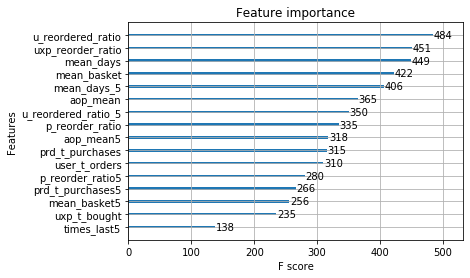

In [74]:
# TRAIN FULL 
###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost as xgb

##########################################
## SPLIT DF TO: X_train, y_train (axis=1)
##########################################
X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered

########################################
## SET BOOSTER'S PARAMETERS
########################################
parameters = {'eval_metric':'logloss', 
              'max_depth': 5, 
              'colsample_bytree': 0.4,
              'subsample': 0.75,
             }

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

########################################
## TRAIN MODEL
########################################
model = xgbc.fit(X_train, y_train)

##################################
# FEATURE IMPORTANCE - GRAPHICAL
##################################
xgb.plot_importance(model)


In [75]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'parameters': {'eval_metric': 'logloss',
  'max_depth': 5,
  'colsample_bytree': 0.4,
  'subsample': 0.75},
 'num_boost_round': 10}

In [88]:
###########################
## DISABLE WARNINGS
###########################
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

####################################
## SET BOOSTER'S RANGE OF PARAMETERS
# IMPORTANT NOTICE: Fine-tuning an XGBoost model may be a computational prohibitive process with a regular computer or a Kaggle kernel. 
# Be cautious what parameters you enter in paramiGrid section.
# More paremeters means that GridSearch will create and evaluate more models.
####################################    
paramGrid = {"max_depth":[5,10],
            "colsample_bytree":[0.3,0.4],
            "n_estimators":[50,100,150,200]}  

########################################
## INSTANTIATE XGBClassifier()
########################################
xgbc = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',num_boost_round=10,sampling_method='gradient_based', gpu_id=0, tree_method = 'hist')

##############################################
## DEFINE HOW TO TRAIN THE DIFFERENT MODELS
#############################################
gridsearch = GridSearchCV(xgbc, paramGrid, cv=3, verbose=2, n_jobs=1)

################################################################
## TRAIN THE MODELS
### - with the combinations of different parameters
### - here is where GridSearch will be exeucuted
#################################################################
model = gridsearch.fit(X_train, y_train)

##################################
## OUTPUT(S)
##################################
# Print the best parameters
print("The best parameters are: /n",  gridsearch.best_params_)

# Store the model for prediction (chapter 5)
model = gridsearch.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.3, max_depth=5, n_estimators=50, num_boost_round=10 
[13:51:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.3, max_depth=5, n_estimators=50, num_boost_round=10, total=  10.8s
[CV] colsample_bytree=0.3, max_depth=5, n_estimators=50, num_boost_round=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


[13:51:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.3, max_depth=5, n_estimators=50, num_boost_round=10, total=  10.8s
[CV] colsample_bytree=0.3, max_depth=5, n_estimators=50, num_boost_round=10 
[13:51:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.3, max_depth=5, n_es

[CV]  colsample_bytree=0.3, max_depth=5, n_estimators=200, num_boost_round=20, total=  33.4s
[CV] colsample_bytree=0.3, max_depth=5, n_estimators=200, num_boost_round=20 
[13:56:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.3, max_depth=5, n_estimators=200, num_boost_round=20, total=  32.4s
[CV] colsample_bytree=0.3, max_depth=5, n_estimators=200, num_boost_round=20 
[13:57:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoo

[CV]  colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=15, total=  15.0s
[CV] colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=15 
[14:00:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=15, total=  15.0s
[CV] colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=15 
[14:00:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoo

[CV]  colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=10, total=  15.0s
[CV] colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=10 
[14:08:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=10, total=  14.9s
[CV] colsample_bytree=0.3, max_depth=10, n_estimators=50, num_boost_round=10 
[14:09:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoo

[CV]  colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=20, total= 9.4min
[CV] colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=20 
[14:21:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=20, total=   6.7s
[CV] colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=20 
[14:21:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost c

[CV]  colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=15, total=   5.9s
[CV] colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=15 
[14:24:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=15, total=   5.9s
[CV] colsample_bytree=0.4, max_depth=5, n_estimators=50, num_boost_round=15 
[14:24:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost c

[CV]  colsample_bytree=0.4, max_depth=10, n_estimators=200, num_boost_round=10, total=  26.2s
[CV] colsample_bytree=0.4, max_depth=10, n_estimators=200, num_boost_round=10 
[14:26:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.4, max_depth=10, n_estimators=200, num_boost_round=10, total=  26.3s
[CV] colsample_bytree=0.4, max_depth=10, n_estimators=200, num_boost_round=10 
[14:27:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to X

[CV]  colsample_bytree=0.4, max_depth=10, n_estimators=50, num_boost_round=20, total=   8.6s
[CV] colsample_bytree=0.4, max_depth=10, n_estimators=50, num_boost_round=20 
[14:31:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  colsample_bytree=0.4, max_depth=10, n_estimators=50, num_boost_round=20, total=   8.6s
[CV] colsample_bytree=0.4, max_depth=10, n_estimators=50, num_boost_round=20 
[14:31:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoo

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 40.6min finished


[14:31:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The best parameters are: /n {'colsample_bytree': 0.4, 'max_depth': 5, 'n_estimators': 50, 'num_boost_round': 10}


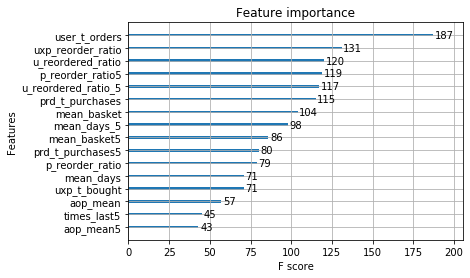

In [89]:
##################################
# FEATURE IMPORTANCE - GRAPHICAL
##################################
xgb.plot_importance(model)

In [82]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.4,
 'gamma': 0,
 'gpu_id': 0,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'hist',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss',
 'num_boost_round': 10}

In [ ]:
del [orders_future,X_train,y_train]
gc.collect()

# 5. Apply predictive model (predict)
The model that we have created is stored in the **model** object.
At this step we predict the values for the test data and we store them in a new column in the same DataFrame.

In [ ]:
'''
# Predict values for test data with our model from chapter 5 - the results are saved as a Python array
test_pred = model.predict(data_test).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array
'''

In [ ]:
## OR set a custom threshold (in this problem, 0.21 yields the best prediction)
test_pred = (model.predict_proba(data_test)[:,1] >= 0.21).astype(int)
test_pred[0:20] #display the first 20 predictions of the numpy array

In [ ]:
#Save the prediction in a new column in the data_test DF
data_test['prediction'] = test_pred
data_test.head()

In [ ]:
#Reset the index
final = data_test.reset_index()
#Keep only the required columns to create our submission file (Chapter 6)
final = final[['product_id', 'user_id', 'prediction']]

gc.collect()
final.head()

# 6. Creation of Submission File
To submit our prediction to Instacart competition we have to get for each user_id (test users) their last order_id. The final submission file should have the test order numbers and the products that we predict that are going to be bought.

To create this file we retrieve from orders DataFrame all the test orders with their matching user_id:

In [ ]:
orders_test = orders.loc[orders.eval_set=='test',("user_id", "order_id") ]
orders_test.head()

We merge it with our predictions (from chapter 5) using a left join:
<img src="https://i.imgur.com/KJubu0v.jpg" width="400">

In [ ]:
final = final.merge(orders_test, on='user_id', how='left')
final.head()

And we move on with two final manipulations:
- remove any undesired column (in our case user_id)
- set product_id column as integer (mandatory action to proceed to the next step)

In [ ]:
#remove user_id column
final = final.drop('user_id', axis=1)
#convert product_id as integer
final['product_id'] = final.product_id.astype(int)

#Remove all unnecessary objects
del orders
del orders_test
gc.collect()

final.head()

In this step we initiate an empty dictionary. In this dictionary we will place as index the order_id and as values all the products that the order will have. If none product will be purchased, we have explicitly to place the string "None". All this syntax follows the requirements of the competition for the submission file.

In [ ]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

#We now check how the dictionary were populated (open hidden output)
d

Now we convert the dictionary to a DataFrame and prepare it to extact it into a .csv file

In [ ]:
#Convert the dictionary into a DataFrame
sub = pd.DataFrame.from_dict(d, orient='index')

#Reset index
sub.reset_index(inplace=True)
#Set column names
sub.columns = ['order_id', 'products']

sub.head()

**The submission file should have 75.000 predictions to be submitted in the competition**

In [ ]:
#Check if sub file has 75000 predictions
sub.shape[0]

The DataFrame can now be converted to .csv file. Pandas can export a DataFrame to a .csv file with the .to_csv( ) function.

In [ ]:
sub.to_csv('sub.csv', index=False)

# 7. Get F1 Score

Before you are ready to submit your prediction to the competion, **ensure that**:
- **You have used all of the offered data and not the 10% that was defined as an optional step on section 1.2**

To submit your prediction and get the F1 score you have to:
1. Commit this notebook and wait for the results 
2. Go to view mode (where you see your notebook but you can't edit it)
3. Click on the data section from your left panel
4. Find the sub.csv (on outputs), below the section with the data from Instacart
5. Click on "Submit to competition" button

Regarding step 1:
>This step might take long. If it exceeds 20-30 minutes it would be wise to check your code again. Kaggle won't inform you during commit if the notebook has:
- syntax errors
- if it exceeds 16 GB RAM
- if it takes an algorirthms too much to train or predict

>Any new commit:
- can't take more than 9 hours
- doesn't stop if it exceeds the 16 GB RAM - you will just receive an error of unsuccesful commit after 9 hours